In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Results/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat_val = []
long_val = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lat_val.append(lat_lng[0])
        long_val.append(lat_lng[1])

In [3]:
# Print the city count to confirm sufficient count
len(cities)

770

## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [7]:
# set up lists to hold reponse info
lat = []
temp = []
humid = []
cloud = []
wind = []

# Loop through the list of cities and perform a request for data on each
for i in range(len(cities)):
    #Include a print log of each city as it's being processed with the city number and city name
    c_city = citipy.nearest_city(lat_val[i], long_val[i]).city_name
    c_country = citipy.nearest_city(lat_val[i], long_val[i]).country_code
    print(f"City: {c_city}, Country code:{c_country}")
    
    response = requests.get(query_url + cities[i]).json()
    try:
        lat.append(response['coord']['lat'])
    except KeyError:
        lat.append(np.NaN)
    try:
        temp.append(response['main']['temp'])
    except KeyError:
        temp.append(np.NaN)
    try:
        humid.append(response['main']['humidity'])
    except KeyError:
        humid.append(np.NaN)   
    try:
        cloud.append(response['clouds']['all'])
    except KeyError:
        cloud.append(np.NaN)  
    try:
        wind.append(response['wind']['speed'])
    except KeyError:
        wind.append(np.NaN)
        
    

City: vaini, Country code:to
City: prilep, Country code:mk
City: avarua, Country code:ck
City: busselton, Country code:au
City: tilichiki, Country code:ru
City: coquimbo, Country code:cl
City: derzhavinsk, Country code:kz
City: port lincoln, Country code:au
City: bathsheba, Country code:bb
City: hasaki, Country code:jp
City: thompson, Country code:ca
City: vestmannaeyjar, Country code:is
City: bethel, Country code:us
City: sao gabriel da cachoeira, Country code:br
City: carnarvon, Country code:au
City: general pico, Country code:ar
City: solnechnyy, Country code:ru
City: belushya guba, Country code:ru
City: norman wells, Country code:ca
City: port alfred, Country code:za
City: ushuaia, Country code:ar
City: albany, Country code:au
City: jamestown, Country code:sh
City: mahibadhoo, Country code:mv
City: aklavik, Country code:ca
City: matinhos, Country code:br
City: banswara, Country code:in
City: mar del plata, Country code:ar
City: rikitea, Country code:pf
City: cidreira, Country code:

City: san cristobal, Country code:ec
City: nyurba, Country code:ru
City: alto araguaia, Country code:br
City: faya, Country code:td
City: portland, Country code:au
City: luderitz, Country code:na
City: kuah, Country code:my
City: lata, Country code:sb
City: banyo, Country code:cm
City: korla, Country code:cn
City: egvekinot, Country code:ru
City: tecpan, Country code:mx
City: sola, Country code:vu
City: bilibino, Country code:ru
City: ondorhaan, Country code:mn
City: cozumel, Country code:mx
City: margate, Country code:za
City: evensk, Country code:ru
City: anadyr, Country code:ru
City: lagoa, Country code:pt
City: along, Country code:in
City: kaili, Country code:cn
City: kizhinga, Country code:ru
City: hambantota, Country code:lk
City: maniitsoq, Country code:gl
City: kampene, Country code:cd
City: caravelas, Country code:br
City: falmouth, Country code:us
City: georgetown, Country code:sh
City: san carlos de bariloche, Country code:ar
City: kinkala, Country code:cg
City: hofn, Countr

City: macrohon, Country code:ph
City: amuntai, Country code:id
City: almenara, Country code:br
City: cradock, Country code:za
City: necochea, Country code:ar
City: sao felix do xingu, Country code:br
City: okandja, Country code:ga
City: zhanakorgan, Country code:kz
City: banda aceh, Country code:id
City: komsomolskiy, Country code:ru
City: broome, Country code:au
City: north platte, Country code:us
City: belmonte, Country code:br
City: diu, Country code:in
City: kalmunai, Country code:lk
City: florence, Country code:us
City: lorengau, Country code:pg
City: binga, Country code:cd
City: phan thiet, Country code:vn
City: leshukonskoye, Country code:ru
City: luba, Country code:gq
City: mizoch, Country code:ua
City: neuquen, Country code:ar
City: basoko, Country code:cd
City: tabuny, Country code:ru
City: port hedland, Country code:au
City: nemuro, Country code:jp
City: igarka, Country code:ru
City: vikhorevka, Country code:ru
City: andapa, Country code:mg
City: adre, Country code:td
City: 

City: samalaeulu, Country code:ws
City: bafoulabe, Country code:ml
City: vicuna, Country code:cl
City: tiznit, Country code:ma
City: muzhi, Country code:ru
City: ballina, Country code:ie
City: bursol, Country code:ru
City: auki, Country code:sb
City: casa grande, Country code:us


In [8]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": cities,
    "Latitude": lat,
    "Temperature": temp,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,vaini,15.34,56.47,82.0,0.0,3.09
1,prilep,NaN,NaN,NaN,NaN,NaN
2,avarua,-21.21,80.60,61.0,40.0,9.17
3,busselton,-33.64,67.95,99.0,0.0,17.11
4,tilichiki,60.47,19.26,74.0,24.0,11.86


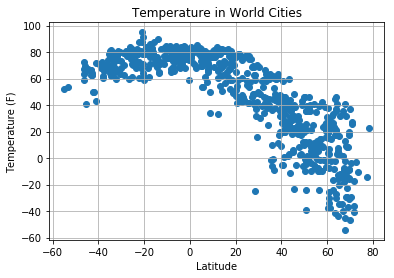

In [9]:
# Temperature (F) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Results/LatitudevsTemperature.png")

# Show plot
plt.show()

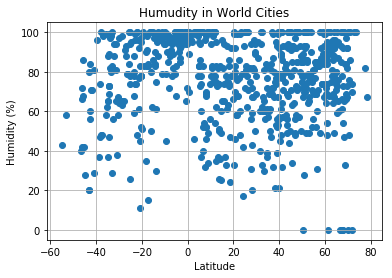

In [10]:
# Humidity (%) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humudity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Results/LatitudevsHumidity.png")

# Show plot
plt.show()

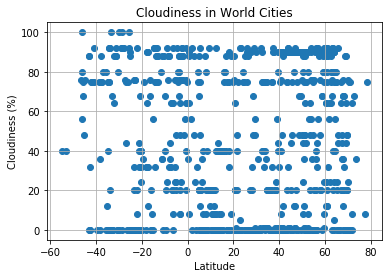

In [11]:
# Cloudiness (%) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Results/LatitudevsCloudiness.png")

# Show plot
plt.show()


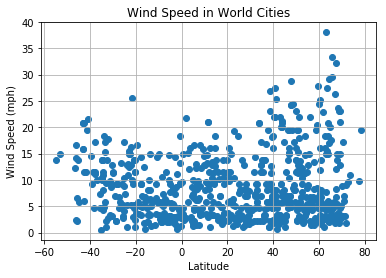

In [12]:
# Wind Speed (mph) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Results/LatitudevsWindSpeed.png")

# Show plot
plt.show()

In [13]:
import csv

#Print results to text file
info = zip(cities, lat, temp, humid, cloud, wind)

# Open the output file, create a header row, and then write the zipped object to the csv
with open(output_data_file, "w", newline="") as datafile:
    writer = csv.writer(datafile)

    writer.writerow(["City", "Latitude", "Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (mph)"])
    writer.writerows(info)